In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-data/retail_sales_dataset.csv


# ****Task - 1****

# ****Sales Data Analysis for a Commercial Store****

# ****Objective****
The goal of this project is to analyze the sales data of a commercial store to identify key trends, patterns, and insights that can help optimize sales strategies, customer segmentation, inventory management, and pricing models.

# ****Import Necessary Libaries**** 

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ****Load the Dataset****

In [91]:
sales_data= pd.read_csv('/kaggle/input/retail-sales-data/retail_sales_dataset.csv')
sales_data.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# ****Dataset overview****

****Findings****
1. The dataset contains 1,000 transactions from a commercial store and each transaction includes 9 column.
2. The dataset contains a mix of numerical (Age, Quantity, Total Amount) and categorical (Product Category, Gender) columns. Most of the numerical columns have the correct data type (int64), while some columns (like Date) are stored as objects and need to be converted to datetime.
3. The describe() method shows that the average age of customers is 41.39 years, with a range from 18 to 64 years. Additionally, the average total spending per transaction is $456, though spending varies significantly across transactions.

In [94]:
sales_data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [92]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [93]:
sales_data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [95]:
sales_data.shape

(1000, 9)

# ****Cleaning Data****

1. The dataset has no missing values. This is an ideal situation, as it means no need for data imputation or removal of missing data before performing the analysis
2. There are no duplicate rows in the dataset. This is important for maintaining data integrity.

In [96]:
#Checking Missing Values
sales_data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [97]:
#Checking Duplicates
sales_data.duplicated().sum()

0

In [98]:
# Convert 'date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Extract day, week, and month
sales_data['day'] = sales_data['Date'].dt.day
sales_data['week'] = sales_data['Date'].dt.isocalendar().week
sales_data['month'] = sales_data['Date'].dt.month

# Display the resulting dataframe
print(sales_data.head(10))

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   
5               6 2023-04-25     CUST006  Female   45           Beauty   
6               7 2023-03-13     CUST007    Male   46         Clothing   
7               8 2023-02-22     CUST008    Male   30      Electronics   
8               9 2023-12-13     CUST009    Male   63      Electronics   
9              10 2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  day  week  month  
0         3              50           150   24    47     11  
1         2             500          1000   27     9      2  

 # ****Exploratory Data Analysis (EDA)****

****1. Distribution of Sales****

In [99]:
sales_data['Total Amount'].value_counts()

Total Amount
50      115
100     108
900      62
200      62
1200     54
30       51
500      51
25       51
1500     50
1000     49
2000     49
300      46
60       45
90       44
120      43
75       43
150      42
600      35
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


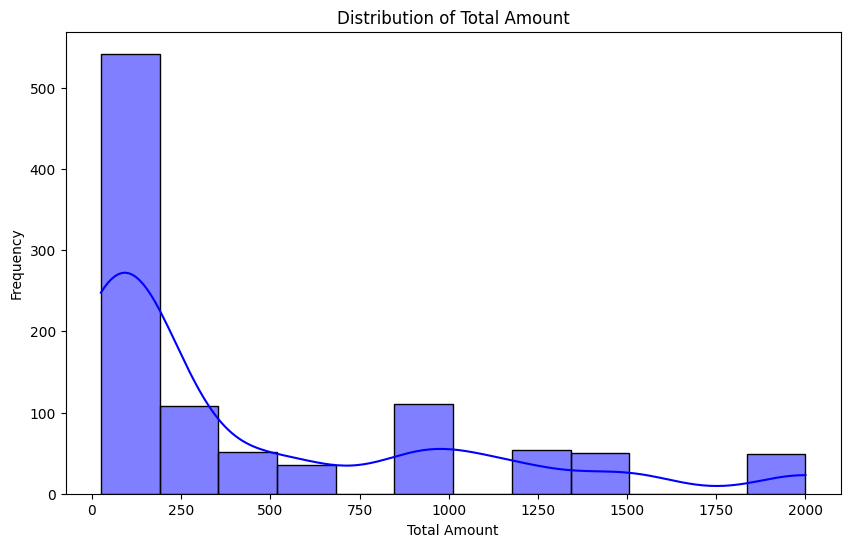

In [100]:
# Plotting the distribution of Total Amount
plt.figure(figsize=(10,6))
sns.histplot(sales_data['Total Amount'], kde=True, color='blue')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

> The sales distribution is right-skewed, with most transactions in the lower range (0-250) and fewer high-value sales above 1000. This indicates that small purchases are more frequent, while large transactions are rare but significant.

****2. Sales Over Time****

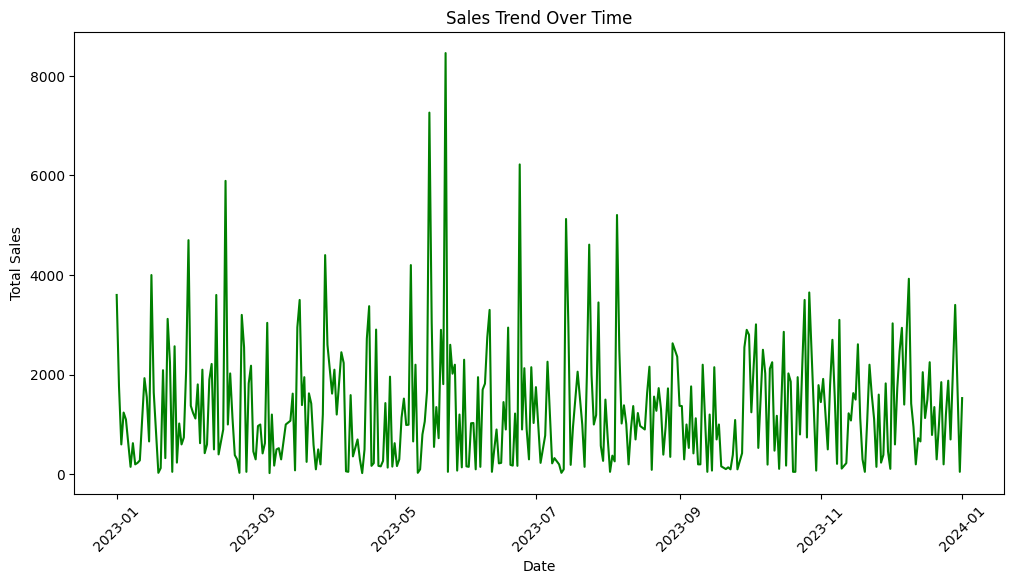

In [101]:
sales_per_day = sales_data.groupby('Date')['Total Amount'].sum().reset_index()

# Plotting sales over time
plt.figure(figsize=(12,6))
plt.plot(sales_per_day['Date'], sales_per_day['Total Amount'], color='green')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

> The sales trend over time shows high fluctuations with occasional peak sales, indicating periodic spikes in revenue. Overall, sales remain inconsistent, suggesting possible seasonality or promotional impacts.

****3. Weekly Sales Distribution****

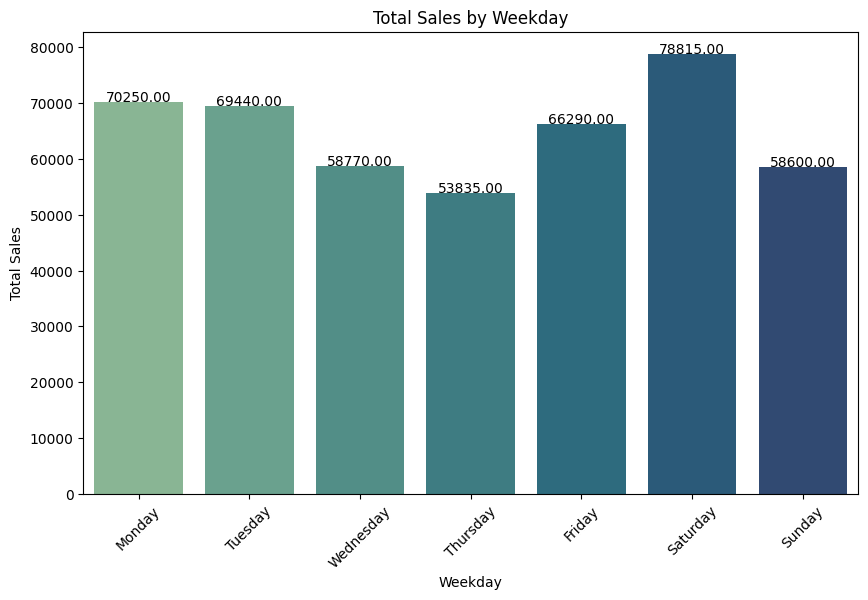

In [102]:
# Extract the weekday from the 'Date' column (0=Monday, 1=Tuesday, ..., 6=Sunday)
sales_data['Weekday'] = sales_data['Date'].dt.day_name()

# Group by weekday and calculate total sales for each weekday
weekday_sales = sales_data.groupby('Weekday')['Total Amount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the total sales by weekday
plt.figure(figsize=(10,6))
ax = sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='crest')

# Annotating the bars with the sales revenue
for i, value in enumerate(weekday_sales):
    ax.text(i, value + 100, f'{value:.2f}', ha='center', color='black', fontsize=10)  

plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.show()

> Sales are highest on Saturdays and lowest on Thursdays, indicating increased shopping activity on weekends. Weekday sales remain relatively stable, with Monday also showing strong performance.

****4. Gender-based Analysis****

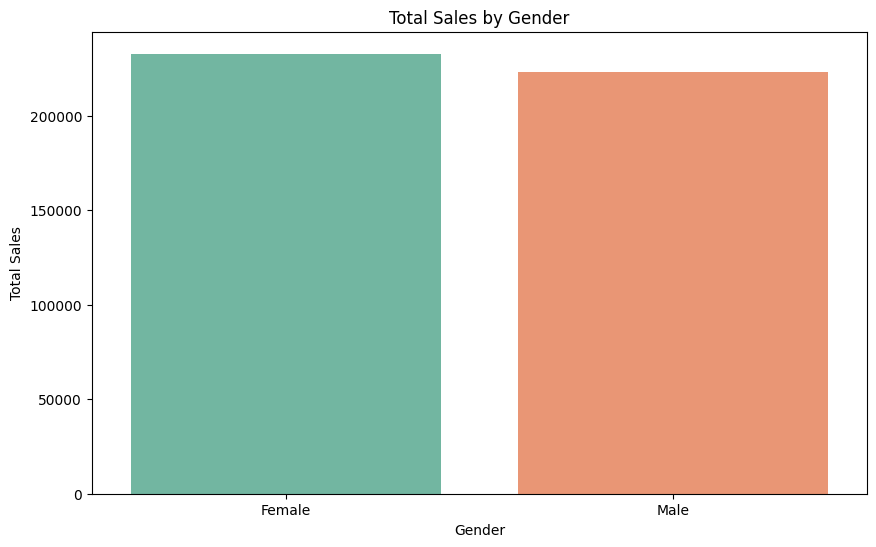

In [103]:
# Group by Gender and calculate the total sales
gender_sales = sales_data.groupby('Gender')['Total Amount'].sum().reset_index()

# Plotting the sales by Gender
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Total Amount', data=gender_sales, palette='Set2')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

> Total sales by females are slightly higher than males, indicating a marginally greater purchasing activity among female customers. However, both genders contribute nearly equally to overall sales.

****5. Age-based Analysis****

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


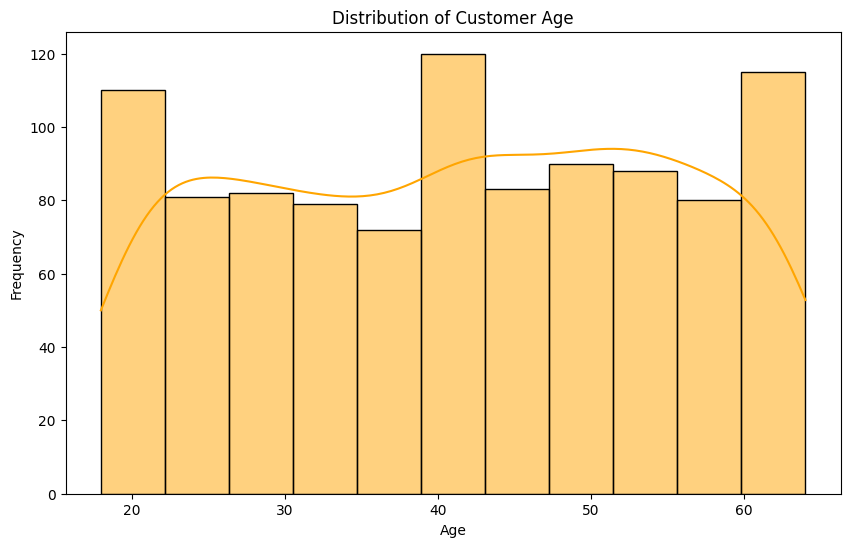

In [104]:
# Plotting the distribution of age
plt.figure(figsize=(10,6))
sns.histplot(sales_data['Age'], kde=True, color='orange')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-109-43dc9fc868d7>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = sales_data.groupby('Age Group')['Total Amount'].sum()


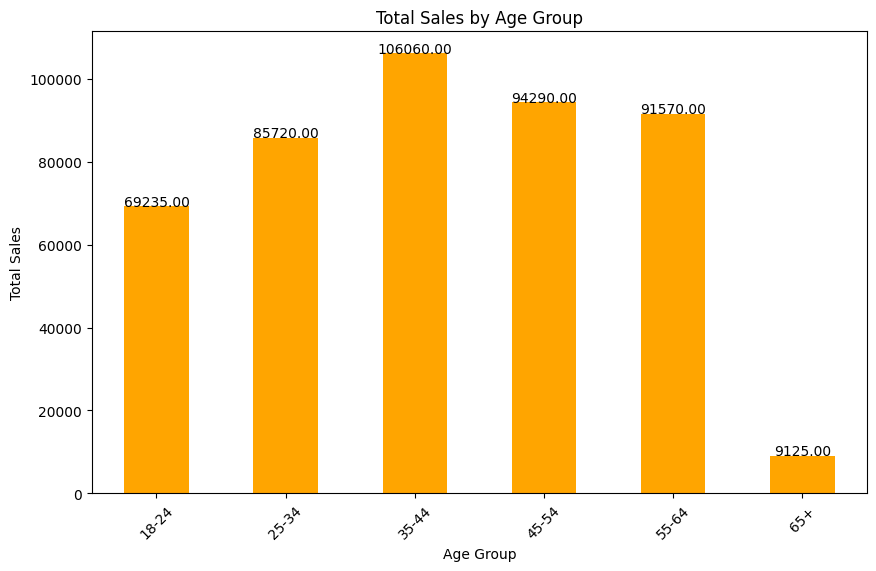

In [109]:
# Define age groups
age_bins = [18, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Add a new column 'Age Group' to the dataset
sales_data['Age Group'] = pd.cut(sales_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Check the updated DataFrame
sales_data[['Age', 'Age Group']].head()
age_sales = sales_data.groupby('Age Group')['Total Amount'].sum()

plt.figure(figsize=(10,6))
ax = age_sales.plot(kind='bar', color='orange')
for i, value in enumerate(age_sales):
    ax.text(i, value + 100, f'{value:.2f}', ha='center', color='black', fontsize=10)
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.show()

> The age group 35-44 has the highest total sales, followed by 45-54 and 55-64, indicating middle-aged customers are the biggest spenders. Sales drop significantly for the 65+ age group.

****6. Product Category Analysis****

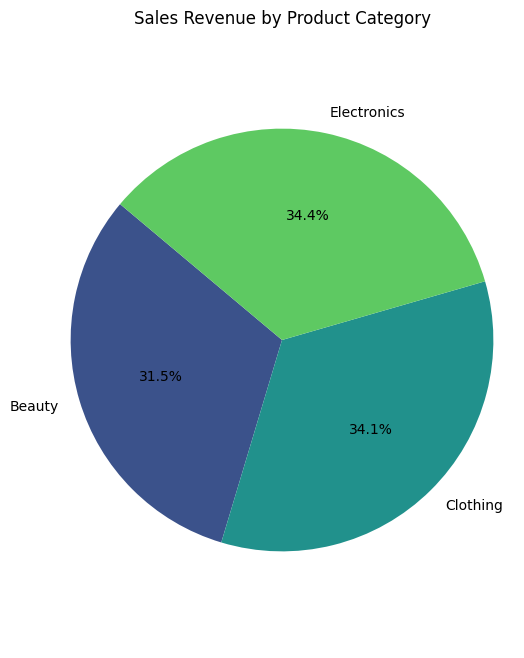

In [110]:
# Group by Product Category and calculate total sales
category_sales = sales_data.groupby('Product Category')['Total Amount'].sum().reset_index()

# Plotting a pie chart of total sales by Product Category
plt.figure(figsize=(6,8))
plt.pie(category_sales['Total Amount'], labels=category_sales['Product Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_sales)))
plt.title('Sales Revenue by Product Category')
plt.axis('equal')  
plt.show()

  > Electronics contribute the highest sales revenue at 34.4%, 
  > Clothing at 34.1%, 
  > Beauty products account for 31.5% of total sales.

****7. Total spending by age group and product category****

In [111]:
# Group by 'Age Group' and 'Product Category' and calculate total sales (Total Amount)
age_category_spending = sales_data.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().reset_index()

# Pivot the data to create a matrix for plotting
spending_pivot = age_category_spending.pivot_table(index='Product Category', columns='Age Group', values='Total Amount', aggfunc='sum')

# Display the pivot table to ensure it's ready for plotting
spending_pivot

<ipython-input-111-a1fdccaada94>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_spending = sales_data.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().reset_index()
<ipython-input-111-a1fdccaada94>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  spending_pivot = age_category_spending.pivot_table(index='Product Category', columns='Age Group', values='Total Amount', aggfunc='sum')


Age Group,18-24,25-34,35-44,45-54,55-64,65+
Product Category,,,,,,
Beauty,26020,24020,36750,33065,21330,2330
Clothing,20010,40090,29625,31350,28950,5555
Electronics,23205,21610,39685,29875,41290,1240


<Figure size 1200x800 with 0 Axes>

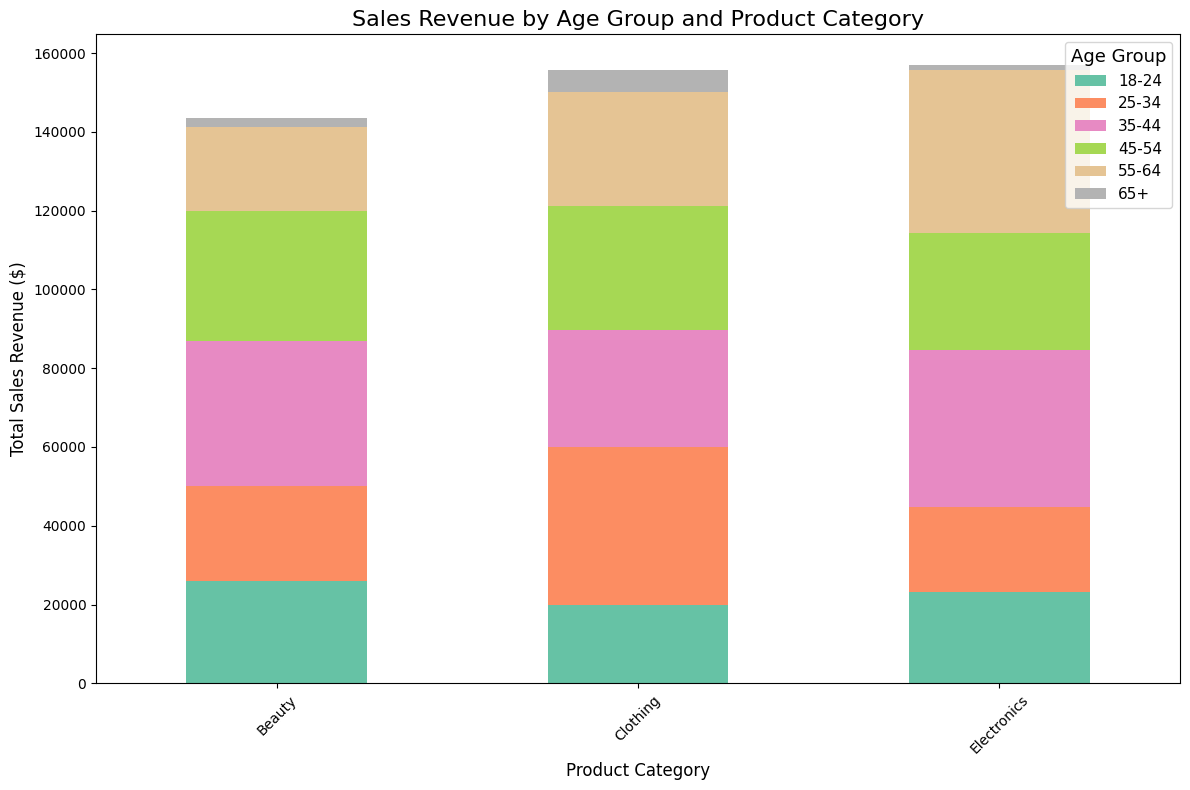

In [112]:
# Plotting the stacked bar plot
plt.figure(figsize=(12, 8))
spending_pivot.plot(kind='bar', stacked=True, figsize=(12,8), colormap='Set2')
plt.title('Sales Revenue by Age Group and Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Age Group', title_fontsize='13', fontsize='11')
plt.tight_layout()

# Show the plot
plt.show()

> Sales revenue is highest in the Clothing and Electronics categories, followed by Beauty. The 35-44 age group contributes the most sales across all categories, while the 65+ group has the least impact. Each product category sees consistent contributions from the 25-34, 35-44, and 45-54 age groups.

****8. Correlation Between Price and Quantity****

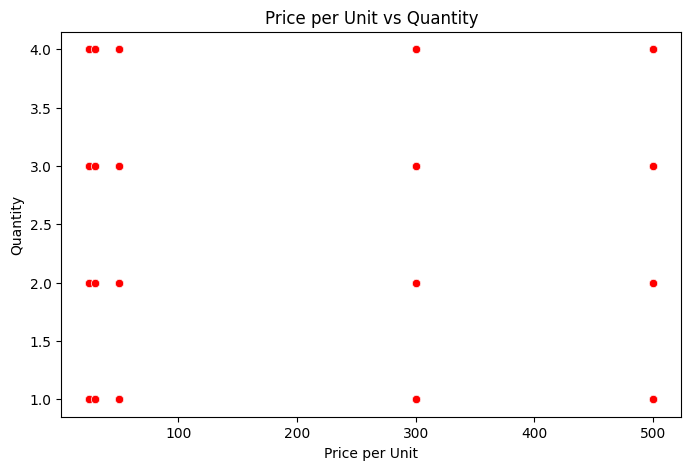

In [113]:
# Scatter plot of Price per Unit vs Quantity
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price per Unit', y='Quantity', data=sales_data, color='red')
plt.title('Price per Unit vs Quantity')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity')
plt.show()

> The scatter plot shows no clear correlation between price per unit and quantity sold. Sales occur across different price ranges, but lower-priced products tend to have more frequent purchases in smaller quantities.

****9. Customer Segmentation****

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


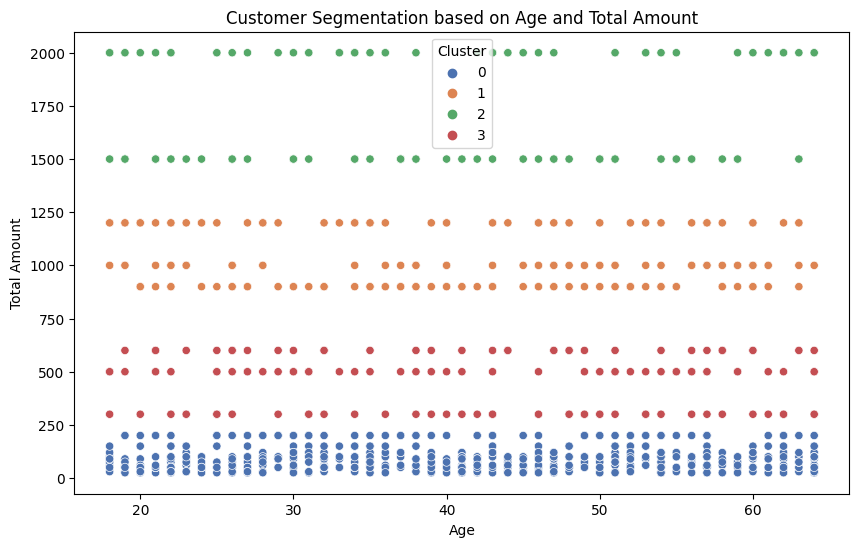

In [114]:
from sklearn.cluster import KMeans

# Select the features for clustering (Age and Total Amount)
X = sales_data[['Age', 'Total Amount']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4)
sales_data['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Total Amount', hue='Cluster', palette='deep', data=sales_data)
plt.title('Customer Segmentation based on Age and Total Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.show()

> Younger customers (below 30) generally make smaller purchases, while higher spenders are distributed across older age groups. The highest spending cluster consists of individuals across different ages but with significantly larger transactions.

# ****Key Findings****

1. Distribution of Sales: The sales revenue distribution revealed that the majority of transactions had relatively lower total amounts, with a few high-value transactions contributing significantly to overall sales.The sales distribution is right-skewed, with most transactions in the lower range (0-250) and fewer high-value sales above 1000. This indicates that small purchases are more frequent, while large transactions are rare but significant.

2. Sales Over Time: The analysis showed that sales exhibited clear seasonal trends, with significant peaks during certain months or specific time periods, indicating periods of high customer demand.

3. Weekly Sales Distribution: Sales are highest on Saturdays and lowest on Thursdays, indicating increased shopping activity on weekends. Weekday sales remain relatively stable, with Monday also showing strong performance.

4. Gender-Based Analysis: A notable difference was observed in sales distribution across genders, with one gender i.s Females contributing significantly more to total sales, indicating potential marketing opportunities to target the other gender more effectively.

5. Age-Based Analysis: Age group 35-44 contributed the most to total sales, suggesting that the store's product offerings may be more appealing to a younger demographic.

6. Product Category Analysis: Certain product categories, such as electronics and clothing, saw consistently high sales, while others, like Beauty products had more sporadic purchasing patterns. This insight can help optimize inventory management.

7. Total Spending by Age Group and Product Category: The highest spenders were found to be in the 35-44 age range, especially in the electronics categories, suggesting targeted promotions for these groups could yield higher sales.

8. Correlation Between Price and Quantity: There was a strong negative correlation between price and quantity sold, indicating that lower-priced items tend to sell in higher volumes, while higher-priced items are purchased less frequently.

9. Customer Segmentation: By segmenting customers based on purchasing behavior, distinct groups were identified, including budget-conscious shoppers and high-value spenders. Tailoring marketing efforts to these segments could improve sales conversion and customer loyalty.